In [721]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from datetime import datetime
from keras.layers.recurrent import LSTM
from keras.layers import Activation, Dense
from keras.losses import mean_squared_error


In [722]:
df = pd.read_csv('/content/train.csv')
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].dt.time

In [723]:
new_time = df['time'].astype(str)
time = new_time
t = time.values.reshape(-1,1)
t = t.reshape(564,1)
type(t)

numpy.ndarray

In [724]:
P = time.astype(str)
for i in range(0,564):
  s = P[i]
  U = s.replace('-', '').replace(':', '') 
  P[i] = U

P = P.astype(str)
df['time'] = P
df['time'] = df.time.astype(int)

In [725]:
df.dtypes

id             int64
time           int64
feature_1    float64
feature_2    float64
dtype: object

In [726]:
df

,id,time,feature_1,feature_2
0,0,0,735.740043,54479.540513
1,1,10,734.102947,47888.033714
2,2,20,730.060336,47700.882325
3,3,30,725.609742,47790.094648
4,4,40,724.328480,47808.402381
...,...,...,...,...
559,559,13310,423.726707,54115.388787
560,560,13320,424.278568,54127.830664
561,561,13330,420.127639,54092.561194
562,562,13340,421.291993,53994.714950


In [727]:
a = df['feature_1'].mean()
b = df['feature_2'].mean()
df['feature_1'] = df['feature_1'] / df['feature_1'].mean()
df['feature_2'] = df['feature_2'] / df['feature_2'].mean()

In [728]:
df

,id,time,feature_1,feature_2
0,0,0,1.404741,1.037954
1,1,10,1.401615,0.912372
2,2,20,1.393897,0.908806
3,3,30,1.385399,0.910506
4,4,40,1.382953,0.910854
...,...,...,...,...
559,559,13310,0.809017,1.031016
560,560,13320,0.810071,1.031253
561,561,13330,0.802146,1.030581
562,562,13340,0.804369,1.028717


In [729]:
x_train = df.iloc[:,1:3].values
y_train = df.iloc[:,3].values

In [730]:
x_train = x_train.reshape(564,1,2)
y_train = y_train.reshape(564, 1)

In [731]:
import keras 
from keras.layers import LSTM
from keras.layers import Dense, Dropout, GRU, Bidirectional
from keras.models import Sequential

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1,2) ))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
print(model.summary())

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 64)                17152     
_________________________________________________________________
dense_109 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_110 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 17        
Total params: 19,777
Trainable params: 19,777
Non-trainable params: 0
_________________________________________________________________
None


In [745]:
history = model.fit(x_train, y_train, epochs = 10)
model.evaluate(x_train,y_train)

Epoch 1/10
564/564 [==============================] - 0s 275us/step - loss: 0.2411
Epoch 2/10
564/564 [==============================] - 0s 242us/step - loss: 0.2071
Epoch 3/10
564/564 [==============================] - 0s 241us/step - loss: 0.2166
Epoch 4/10
564/564 [==============================] - 0s 374us/step - loss: 0.1798
Epoch 5/10
564/564 [==============================] - 0s 251us/step - loss: 0.1759
Epoch 6/10
564/564 [==============================] - 0s 296us/step - loss: 0.1580
Epoch 7/10
564/564 [==============================] - 0s 265us/step - loss: 0.1761
Epoch 8/10
564/564 [==============================] - 0s 249us/step - loss: 0.1628
Epoch 9/10
564/564 [==============================] - 0s 252us/step - loss: 0.1692
Epoch 10/10
564/564 [==============================] - 0s 67us/step


0.14745844879471665

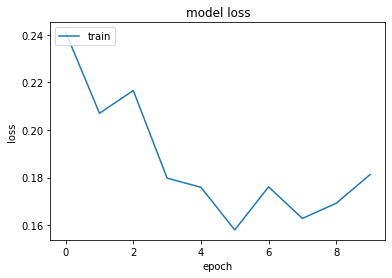

In [746]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [747]:
df_test = pd.read_csv('/content/test.csv')
df_test

,id,time,feature_1
0,564,2019-03-19 01:34:00,423.064004
1,565,2019-03-19 01:34:10,423.342749
2,566,2019-03-19 01:34:20,423.181186
3,567,2019-03-19 01:34:30,421.275243
4,568,2019-03-19 01:34:40,422.208444
...,...,...,...
370,934,2019-03-19 02:35:40,432.292203
371,935,2019-03-19 02:35:50,433.661272
372,936,2019-03-19 02:36:00,435.686429
373,937,2019-03-19 02:36:10,444.585521


In [748]:
df_test['time'] = pd.to_datetime(df_test['time'])
df_test['time'] = df_test['time'].dt.time
new_time = df_test['time'].astype(str)
time = new_time
t = time.values.reshape(-1,1)
t = t.reshape(375,1)
P = time.astype(str)
for i in range(0,375):
  s = P[i]
  U = s.replace('-', '').replace(':', '') 
  P[i] = U

P = P.astype(str)
df_test['time'] = P

In [749]:
c = df_test['feature_1'].mean()
df_test['feature_1'] = df_test['feature_1'] / df_test['feature_1'].mean()
df_test

,id,time,feature_1
0,564,013400,1.033541
1,565,013410,1.034222
2,566,013420,1.033827
3,567,013430,1.029171
4,568,013440,1.031451
...,...,...,...
370,934,023540,1.056085
371,935,023550,1.059430
372,936,023600,1.064377
373,937,023610,1.086118


In [750]:
x_test = df_test.iloc[:,1:3].values
x_test = x_test.reshape(375,1,2)

In [751]:
y_pred = model.predict(x_test)
df_test['feature_2'] = y_pred 
df_test['feature_1'] = df_test['feature_1'] * c
df_test['feature_2'] = y_pred * b
df_test

,id,time,feature_1,feature_2
0,564,013400,423.064004,73234.523438
1,565,013410,423.342749,73278.976562
2,566,013420,423.181186,73341.046875
3,567,013430,421.275243,73379.085938
4,568,013440,422.208444,73433.148438
...,...,...,...,...
370,934,023540,432.292203,125570.984375
371,935,023550,433.661272,125625.445312
372,936,023600,435.686429,125884.132812
373,937,023610,444.585521,125932.984375


In [752]:
y_pred_train = model.predict(x_train)

In [753]:
RMSE = np.sqrt(np.mean(np.square(y_pred_train - y_train)))
print("Root Mean Square Error is ",RMSE)

Root Mean Square Error is  0.3840031876942803
